In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from qutip import Bloch, about, basis, mesolve,sigmax, sigmay, sigmaz,identity,fidelity,expect

%matplotlib inline

In [3]:
# operators and the hamiltonian
sx = sigmax()
sy = sigmay()
sz = sigmaz()
I = identity(2)

In [4]:
def qubit_integrate(psi0, tlist,w0,detuning,rabi_amp):

    w1 = w0-detuning*rabi_amp
    # evolve and calculate expectation values
    H0 = w0*sz/2
    H1 = rabi_amp*sx
    def H1_coeff(t,args):
        return np.cos(w1*t)
    H = [H0,[H1,H1_coeff]]
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[])
    return output

# Population with time and scanning frequency
$\Delta = (0,1,2)\Omega$

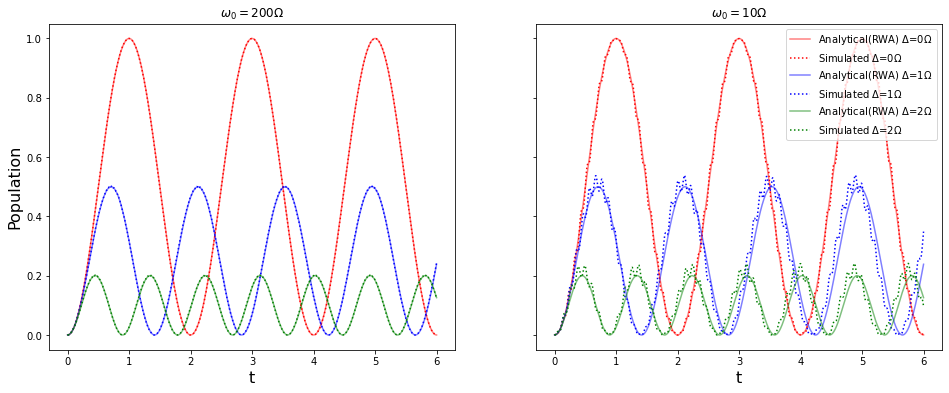

In [5]:
psi0 = basis(2, 0)
psi1 = basis(2, 1)
res = []
tlist = np.linspace(0,2,500)
loop_num = 3
rabi_amp = np.pi
w0 = 200*rabi_amp
w1 = 10*rabi_amp
t = np.linspace(0,np.max(tlist)*loop_num,loop_num*len(tlist))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,6))
def get_excited_state(detuning,rabi_amp,tlist):
    detuning = detuning*rabi_amp
    V = np.sqrt(rabi_amp**2+detuning**2)
    P_excited = rabi_amp**2/(rabi_amp**2+detuning**2)*np.sin(V*tlist/2)**2
    return P_excited
cmap = ["red","blue","green"]
for detuning in range(3):
    res = []
    psi0 = basis(2, 0)
    for num in range(loop_num):
        result = qubit_integrate(psi0, tlist,w0,detuning,rabi_amp)
        psi0 = result.states[-1]
        for state in result.states:
            res.append(expect(psi1*psi1.dag(),state))
    ax1.plot(t,get_excited_state(detuning,rabi_amp,t),label=f"Analytical(RWA) $\Delta$={detuning}$\Omega$",c=cmap[detuning],alpha=0.5)
    ax1.plot(t,res,label=f"Simulated $\Delta$={detuning}$\Omega$",linestyle=":",c=cmap[detuning])
for detuning in range(3):
    res = []
    psi0 = basis(2, 0)
    for num in range(loop_num):
        result = qubit_integrate(psi0, tlist,w1,detuning,rabi_amp)
        psi0 = result.states[-1]
        for state in result.states:
            res.append(expect(psi1*psi1.dag(),state))
    ax2.plot(t,get_excited_state(detuning,rabi_amp,t),label=f"Analytical(RWA) $\Delta$={detuning}$\Omega$",c=cmap[detuning],alpha=0.5)
    ax2.plot(t,res,label=f"Simulated $\Delta$={detuning}$\Omega$",linestyle=":",c=cmap[detuning])
ax1.set_title(r"$\omega_0 = 200\Omega$")
ax1.set_xlabel("t",fontsize=16)
ax1.set_ylabel("Population",fontsize=16)
ax2.set_title(r"$\omega_0 = 10\Omega$")
ax2.set_xlabel("t",fontsize=16)
plt.legend(loc=1)

# Evolution on the bloch sphere
\begin{equation}
\Delta = 0\Omega
\end{equation}

In [6]:
from qutip.ipynbtools import plot_animation

def qubit_integrate_plot(psi0, tlist):

    rabi_amp = np.pi
    w0 = 200*rabi_amp
    w1 = w0
    # evolve and calculate expectation values
    H0 = w0*sz/2
    H1 = rabi_amp*sx
    def H1_coeff(t,args):
        return np.cos(w1*t)
    H = [H0,[H1,H1_coeff]]
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[sx,sy,sz])
    return output

def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]
        

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.point_marker = ['o']
    sphere.point_size = [30]
    sphere.make_sphere()

    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
tlist = np.linspace(0,1,100)
result=  qubit_integrate_plot(psi0, tlist)
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>

\begin{equation}
\Delta = 1\Omega
\end{equation}

In [7]:
from qutip.ipynbtools import plot_animation

def qubit_integrate_plot(psi0, tlist):

    rabi_amp = np.pi
    w0 = 200*rabi_amp
    w1 = w0-rabi_amp
    # evolve and calculate expectation values
    H0 = w0*sz/2
    H1 = rabi_amp*sx
    def H1_coeff(t,args):
        return np.cos(w1*t)
    H = [H0,[H1,H1_coeff]]
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[sx,sy,sz])
    return output

def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]
        

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.point_marker = ['o']
    sphere.point_size = [30]
    sphere.make_sphere()

    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
tlist = np.linspace(0,1,100)
result=  qubit_integrate_plot(psi0, tlist)
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>

# Evolution on the bloch sphere
\begin{equation}
\Delta = 0\Omega
\end{equation}

And with 20\% amplitude error,which means the laser rabi_frequency will fluctuate randomly

reference:https://arxiv.org/pdf/2105.09902.pdf

In [17]:
from qutip import Options
def qubit_integrate_plot_error(psi0, tlist,error):

    rabi_amp = np.pi
    w0 = 200*rabi_amp
    w1 = w0
    # evolve and calculate expectation values
    H0 = w0*sz/2
    H1 = sx*rabi_amp*(1+np.random.uniform(-1,1)*error)
    def H1_coeff(t,args):
        return np.cos(w1*t)
    H = [H0,[H1,H1_coeff]]
    #issue:https://github.com/qutip/qutip/issues/1896
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[sx,sy,sz],options = Options(store_final_state=True))
    return output

from matplotlib import animation
from base64 import b64encode
from IPython.display import HTML, Javascript, display
def plot_animation(plot_setup_func, plot_func, result_lst, name="movie",
                   writer="avconv", codec="libx264", verbose=False):
    """
    Create an animated plot of a Result object, as returned by one of
    the qutip evolution solvers.

    .. note :: experimental
    """

    fig, axes = plot_setup_func(result_lst)

    
    result = [[],[],[]]
    ntimes = 0
    for r in result_lst:
        resx = r.expect[0]
        resy = r.expect[1]
        resz = r.expect[2]
        for ind in range(len(r.times)):
            result[0].append(resx[ind])
            result[1].append(resy[ind])
            result[2].append(resz[ind])
        ntimes += len(r.times)
    def update(n):
        return plot_func(result, n, fig=fig, axes=axes)
    anim = animation.FuncAnimation(
        fig, update, frames= ntimes, blit=True)

    anim.save(name + '.mp4', fps=10, writer=writer, codec=codec)

    plt.close(fig)

    if verbose:
        print("Created %s.m4v" % name)

    video = open(name + '.mp4', "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls src="data:video/x-m4v;base64,{0}">'.format(
        video_encoded)
    return HTML(video_tag)


def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None
def plot_result(result, n, fig=None, axes=None):
    
    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]

    sphere.clear()
    sphere.add_vectors([result[0][n],
                        result[1][n],
                        result[2][n]])
    sphere.add_points(
        [
            result[0][: n + 1],
            result[1][: n + 1],
            result[2][: n + 1],
        ],
        meth="l",
    )
    
    sphere.make_sphere()
    
    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
tlist = np.linspace(0,0.1,50)
loop_num = 10
result_lst = []
for num in range(loop_num):
    result=  qubit_integrate_plot_error(psi0, tlist, 0.2)
    psi0 = result.final_state
    result_lst.append(result)
plot_animation(plot_setup, plot_result, result_lst, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>

In [58]:
from qutip.ipynbtools import plot_animation
from qutip import Options
def qubit_integrate_plot_error(psi0, tlist,error,nsteps=1e5):

    rabi_amp = np.pi
    w0 = 200*rabi_amp
    w1 = w0
    # evolve and calculate expectation values
    H0 = w0*sz/2
    H1 = sx*rabi_amp
    def H1_coeff(t,args):
        coeff = (1+np.random.uniform(-1, 1)*error)
        return coeff*np.cos(w1*t)
    H = [H0,[H1,H1_coeff]]
    #issue:https://github.com/qutip/qutip/issues/1896
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[sx,sy,sz],options=Options(nsteps=nsteps))
    return output

def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]
        

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.point_marker = ['o']
    sphere.point_size = [30]
    sphere.make_sphere()

    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
tlist = np.linspace(0,1,100)
result=  qubit_integrate_plot_error(psi0, tlist,0.5,1e6)
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>

# Another Error Model
add collapse operator.

In [66]:
from qutip.ipynbtools import plot_animation
from qutip import Options
def qubit_integrate_plot_error(psi0, tlist,error):

    rabi_amp = np.pi
    w0 = 200*rabi_amp
    w1 = w0
    # evolve and calculate expectation values
    H0 = w0*sz/2
    H1 = sx*rabi_amp
    def H1_coeff(t,args):
        return np.cos(w1*t)
    H = [H0,[H1,H1_coeff]]
    #issue:https://github.com/qutip/qutip/issues/1896
    c_ops=[[sx*rabi_amp*np.random.uniform(-1, 1)*error,H1_coeff]]
    output = mesolve(H, psi0, tlist,c_ops=c_ops,e_ops=[sx,sy,sz])
    return output

def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]
        

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.point_marker = ['o']
    sphere.point_size = [30]
    sphere.make_sphere()

    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
tlist = np.linspace(0,1,100)
result=  qubit_integrate_plot_error(psi0, tlist,0.2)
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>

In [67]:
from qutip.ipynbtools import plot_animation
from qutip import Options

def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]
        

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.point_marker = ['o']
    sphere.point_size = [30]
    sphere.make_sphere()

    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
tlist = np.linspace(0,1,100)
result=  qubit_integrate_plot_error(psi0, tlist,0.5)
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>